In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

In [5]:
pollutants = pd.read_csv(r"D:\\sft\\PROJECT PURE DELHi\\PureDelhi\\data\\raw.csv",parse_dates=["Timestamp"])
weather = pd.read_csv(r"D:\\sft\PROJECT PURE DELHi\PureDelhi\data\weather.csv",parse_dates=["valid_time"])

<h3 style="color:#e7d3d3"> 1. Data Overview  </h3>

In [6]:
pollutants.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),BP (mmHg),station
0,2020-01-01 00:00:00,481.25,549.25,31.18,9.18,6.18,25.52,4.75,96.93,2.40,993.68,"Sri Aurobindo Marg, Delhi - DPCC"
1,2020-01-01 01:00:00,505.50,591.75,30.80,12.62,7.22,25.90,4.85,97.38,4.88,993.62,"Sri Aurobindo Marg, Delhi - DPCC"
2,2020-01-01 02:00:00,542.00,644.50,25.45,12.30,8.60,26.28,4.53,97.45,3.35,993.62,"Sri Aurobindo Marg, Delhi - DPCC"
3,2020-01-01 03:00:00,609.00,697.50,22.85,10.45,8.57,24.45,4.35,97.58,3.95,993.60,"Sri Aurobindo Marg, Delhi - DPCC"
4,2020-01-01 04:00:00,619.00,689.00,15.15,2.00,7.35,20.38,3.90,98.48,3.72,993.65,"Sri Aurobindo Marg, Delhi - DPCC"


In [7]:
weather.head()

,valid_time,temperature,dew_point,relative_humidity,wind_speed,weather_phrase,visibility
0,2011-01-01 02:30:00,48.0,46.0,95.0,5.0,Fair,0.31
1,2011-01-01 05:30:00,51.0,49.0,95.0,6.0,Cloudy,0.31
2,2011-01-01 08:30:00,50.0,48.0,95.0,6.0,Cloudy,0.31
3,2011-01-01 11:30:00,56.0,48.0,75.0,9.0,Fair,0.62
4,2011-01-01 14:30:00,61.0,47.0,60.0,8.0,Fair,1.00


In [8]:
print("Pollutants Data Shape : ",pollutants.shape)
print("weather Data Shape : ",weather.shape)

Pollutants Data Shape :  (2218674, 12)
weather Data Shape :  (38508, 7)


In [9]:
pollutants.isnull().sum()/pollutants.shape[0]*100

Timestamp         0.000000
PM2.5 (µg/m³)     3.446112
PM10 (µg/m³)      8.097675
NO2 (µg/m³)       3.805381
SO2 (µg/m³)      21.937968
CO (mg/m³)        5.161101
Ozone (µg/m³)     6.303720
AT (°C)          35.704074
RH (%)           21.940357
WS (m/s)         24.769344
BP (mmHg)        34.432684
station           0.000000
dtype: float64

In [10]:
weather.isnull().sum()/weather.shape[0]*100

valid_time            0.000000
temperature           0.194765
dew_point             0.085696
relative_humidity     0.293446
wind_speed           15.461722
weather_phrase        0.005194
visibility            0.002597
dtype: float64

In [8]:
pollutants.describe().loc[["mean","min","max","std"]]

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),BP (mmHg)
mean,2021-04-30 20:12:00.850561024,102.455942,209.106610,40.257043,12.503530,1.328807,31.532086,25.580859,60.303088,1.104312,955.347632
min,2017-01-01 00:00:00,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.100000,0.010000,0.010000,700.000000
max,2024-10-20 23:00:00,1000.000000,1000.000000,499.800000,200.000000,49.620000,200.000000,58.900000,100.000000,47.530000,1098.900000
std,NaN,97.237433,149.637507,36.311908,11.153561,1.201089,33.862157,8.532997,21.917778,1.099265,76.727709


<h3 style="color:#e7d3d3"> 2. Formatting DataFrame</h3>

In [11]:
pollutants = pollutants.drop(columns=["station"])
weather = weather.drop(columns=["weather_phrase"])

In [12]:
pollutants = pollutants.groupby("Timestamp").median()
pollutants = pollutants.resample("D").mean()


In [13]:
weather.set_index("valid_time", inplace=True)
weather = weather.resample("D").mean()

In [14]:
df = pollutants.join(weather, how="left")

In [15]:
df = df.drop(columns=["AT (°C)","RH (%)","WS (m/s)","BP (mmHg)"])
df.reset_index(inplace=True)

In [14]:
df = df.rename(columns={
    "PM2.5 (µg/m³)": "PM2.5","PM10 (µg/m³)": "PM10","NO2 (µg/m³)": "NO2",
    "SO2 (µg/m³)": "SO2","CO (mg/m³)": "CO","Ozone (µg/m³)": "Ozone","relative_humidity": "Humidity",
    "wind_speed": "WindSpeed","visibility": "Visibility","dew_point": "DewPoint","temperature": "Temp_F"
})


In [15]:
df.head()

,Timestamp,PM2.5,PM10,NO2,SO2,CO,Ozone,Temp_F,DewPoint,Humidity,WindSpeed,Visibility
0,2017-01-01,179.919375,353.057083,56.486667,18.429167,3.108958,25.745417,59.125000,55.750,90.000000,1.000,0.655000
1,2017-01-02,192.337292,370.640417,58.451667,18.076458,3.208750,17.280833,60.875000,56.625,87.875000,1.000,0.450000
2,2017-01-03,195.631875,337.943750,60.965208,18.621250,3.474583,11.845417,59.750000,55.750,87.750000,1.375,0.382500
3,2017-01-04,192.196458,313.412708,56.367917,17.366667,2.894167,17.427500,61.500000,54.875,81.750000,1.375,0.575000
4,2017-01-05,189.763958,311.224583,62.449583,19.991667,3.108542,26.343542,62.571429,57.000,83.857143,1.000,0.802857


<h3 style="color:#e7d3d3"> Exploratory Data Analysis </h3>

In [16]:
plt.style.use("gruvbox.mplstyle")

pollutants = ["PM2.5","PM10","NO2","SO2","CO","Ozone"]
weather = ["Humidity","WindSpeed","Visibility","DewPoint","Temp_F"]

In [17]:
numeric = df.select_dtypes(include=["int","float"])

In [17]:
value_pollutants = numeric[pollutants].min()
value_weather = numeric[weather].min()

plt.suptitle("Minimum values")
plt.subplot(1,2,1)
sns.barplot(x=value_pollutants.index , y= value_pollutants)
plt.xlabel("Pollutants")

plt.subplot(1,2,2)
sns.barplot(x=value_weather.index , y=value_weather)
plt.xlabel("Weather")

NameError: name 'numeric' is not defined

Text(0.5, 0, 'Weather')

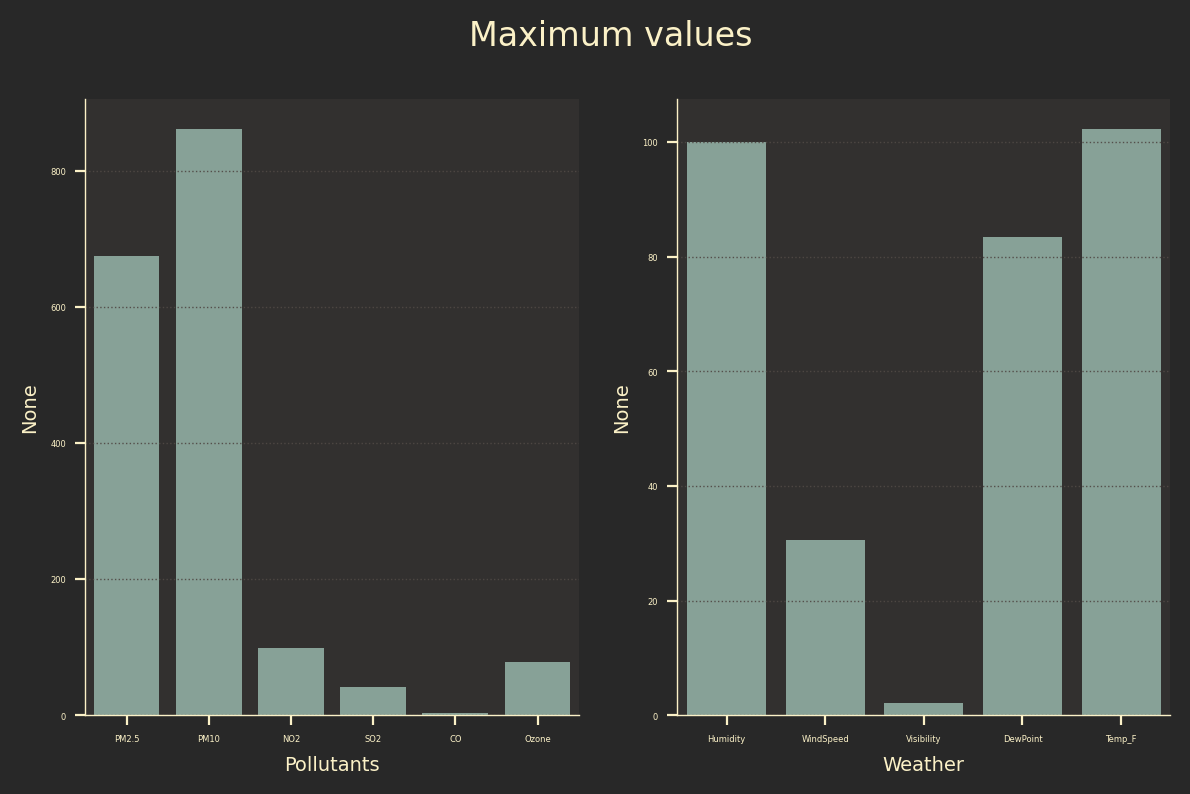

In [19]:
value_pollutants = numeric[pollutants].max()
value_weather = numeric[weather].max()

plt.suptitle("Maximum values")
plt.subplot(1,2,1)
sns.barplot(x=value_pollutants.index , y= value_pollutants,color="C2")
plt.xlabel("Pollutants")

plt.subplot(1,2,2)
sns.barplot(x=value_weather.index , y=value_weather,color="C2")
plt.xlabel("Weather")

Text(0.5, 0, 'Weather')

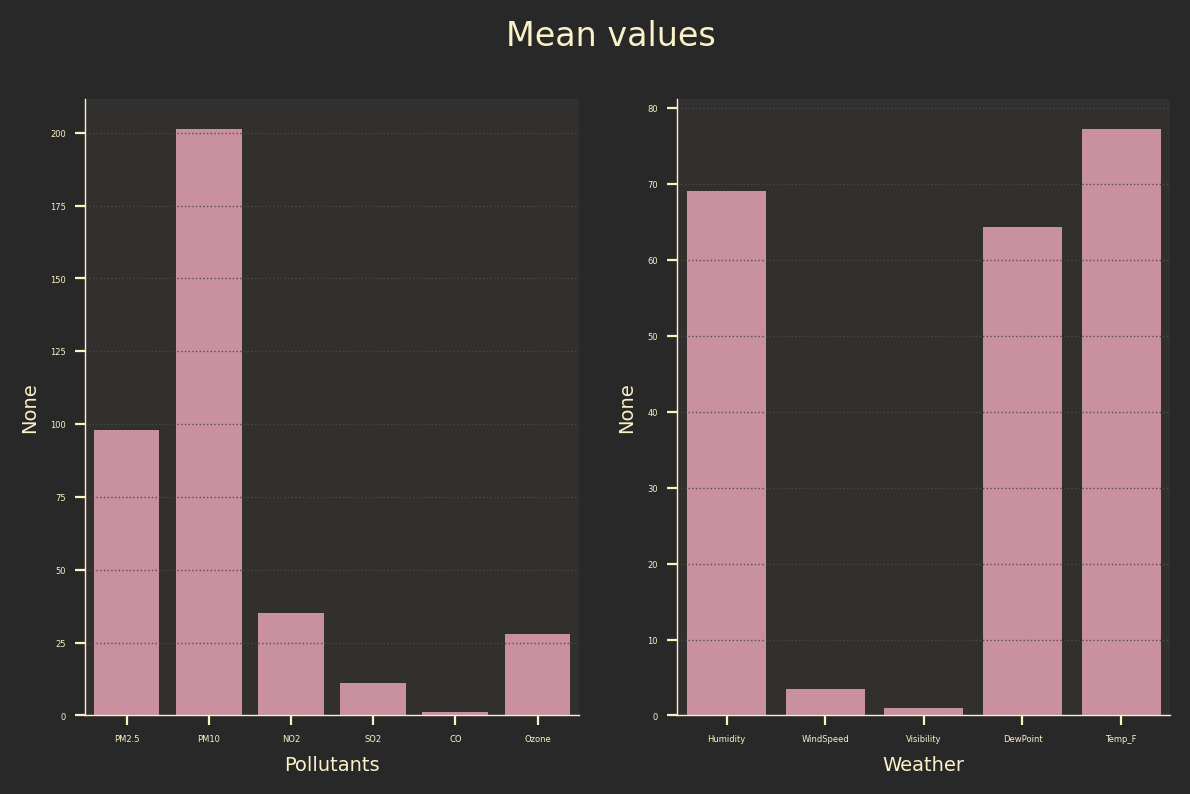

In [20]:
value_pollutants = numeric[pollutants].mean()
value_weather = numeric[weather].mean()

plt.suptitle("Mean values")
plt.subplot(1,2,1)
sns.barplot(x=value_pollutants.index , y= value_pollutants,color="C3")
plt.xlabel("Pollutants")

plt.subplot(1,2,2)
sns.barplot(x=value_weather.index , y=value_weather,color="C3")
plt.xlabel("Weather")

Text(0.5, 0, 'Weather')

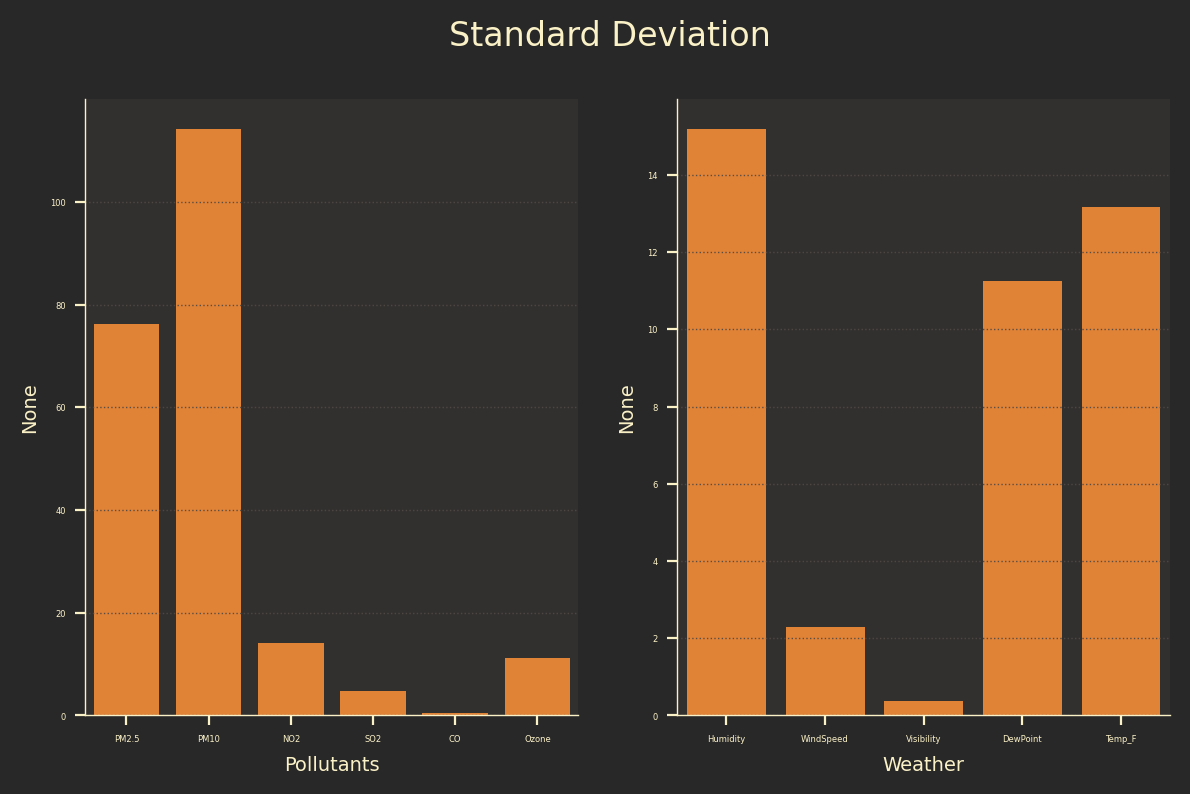

In [21]:
value_pollutants = numeric[pollutants].std()
value_weather = numeric[weather].std()

plt.suptitle("Standard Deviation")
plt.subplot(1,2,1)
sns.barplot(x=value_pollutants.index , y= value_pollutants,color="C4")
plt.xlabel("Pollutants")

plt.subplot(1,2,2)
sns.barplot(x=value_weather.index , y=value_weather,color="C4")
plt.xlabel("Weather")

<Axes: title={'center': 'boxplot'}, xlabel='Pollutants'>

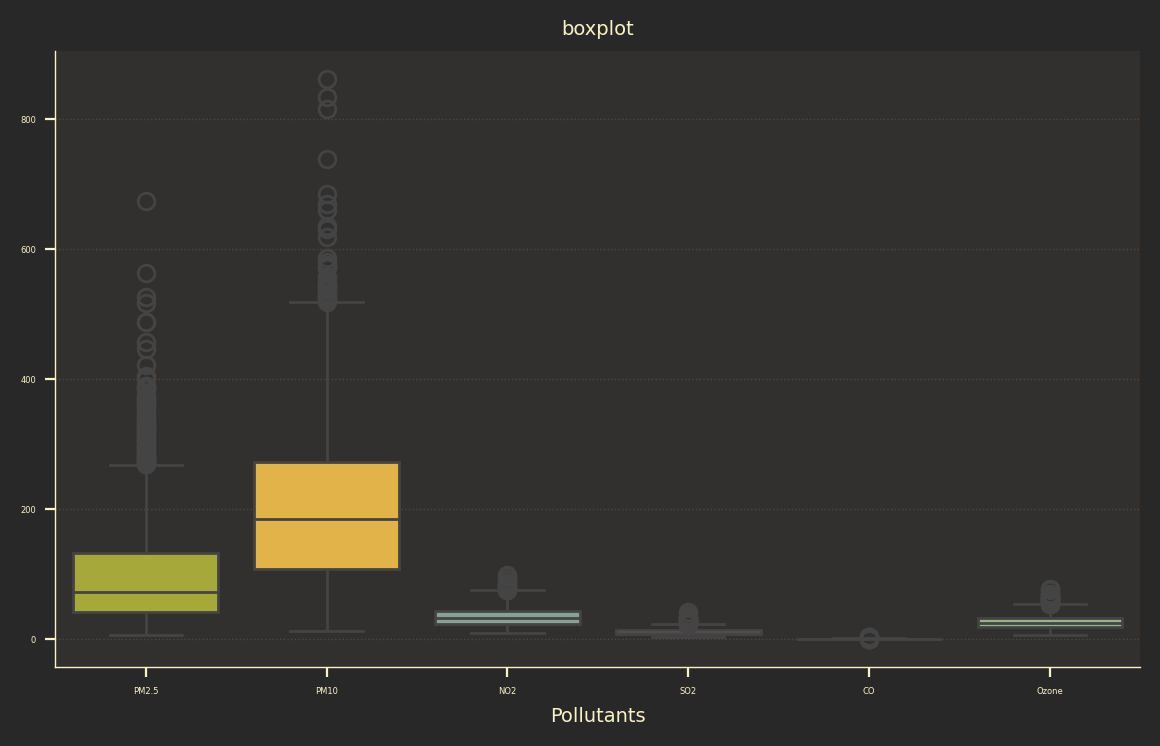

In [22]:
plt.title("boxplot")
plt.xlabel("Pollutants")
sns.boxplot(numeric[pollutants])

<Axes: title={'center': 'boxplot'}, xlabel='Weather'>

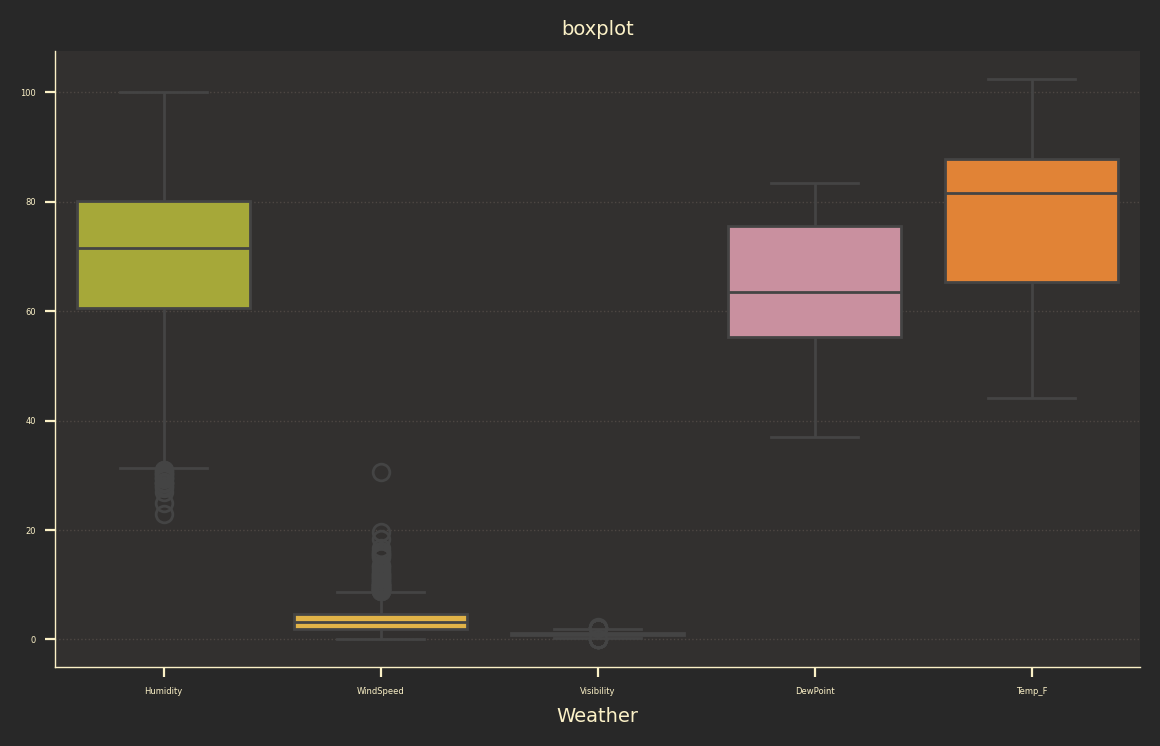

In [23]:
plt.title("boxplot")
plt.xlabel("Weather")
sns.boxplot(numeric[weather])

<Axes: xlabel='PM2.5', ylabel='Density'>

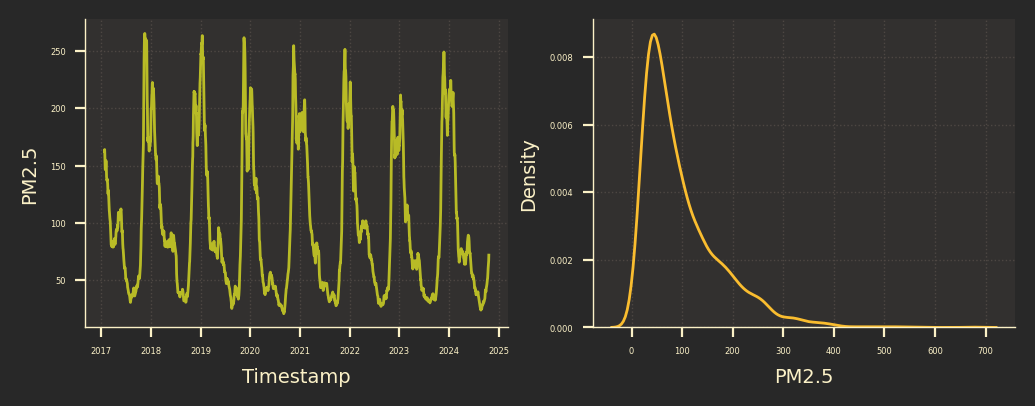

In [24]:

plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.lineplot(x=df.Timestamp , y=df["PM2.5"].rolling(24).mean(),color="C0")
plt.subplot(1,2,2)
sns.kdeplot(df["PM2.5"],color="C1")

<Axes: xlabel='PM10', ylabel='Density'>

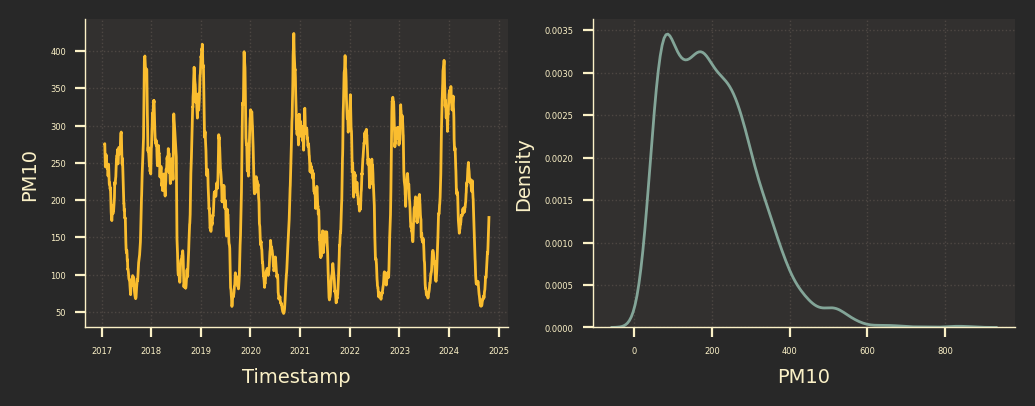

In [25]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.lineplot(x=df.Timestamp , y=df["PM10"].rolling(24).mean(),color="C1")
plt.subplot(1,2,2)
sns.kdeplot(df["PM10"],color="C2")

<Axes: xlabel='NO2', ylabel='Density'>

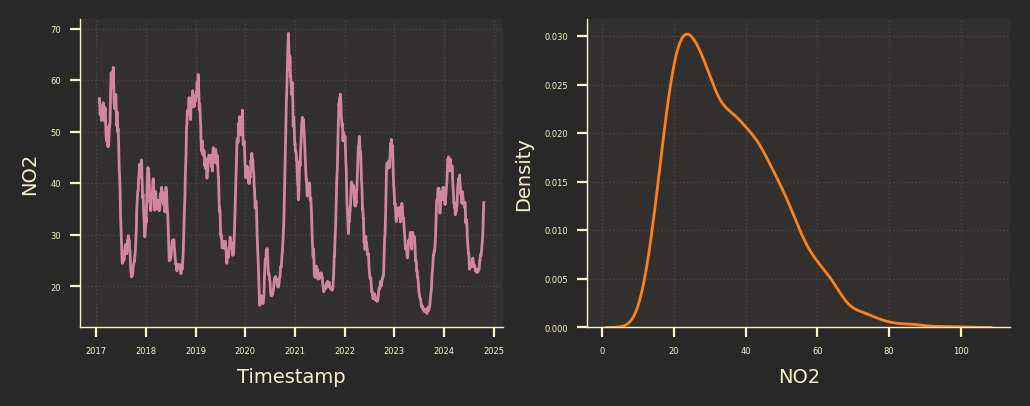

In [26]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.lineplot(x=df.Timestamp , y=df["NO2"].rolling(24).mean(),color="C3")
plt.subplot(1,2,2)
sns.kdeplot(df["NO2"],color="C4")

<Axes: xlabel='CO', ylabel='Density'>

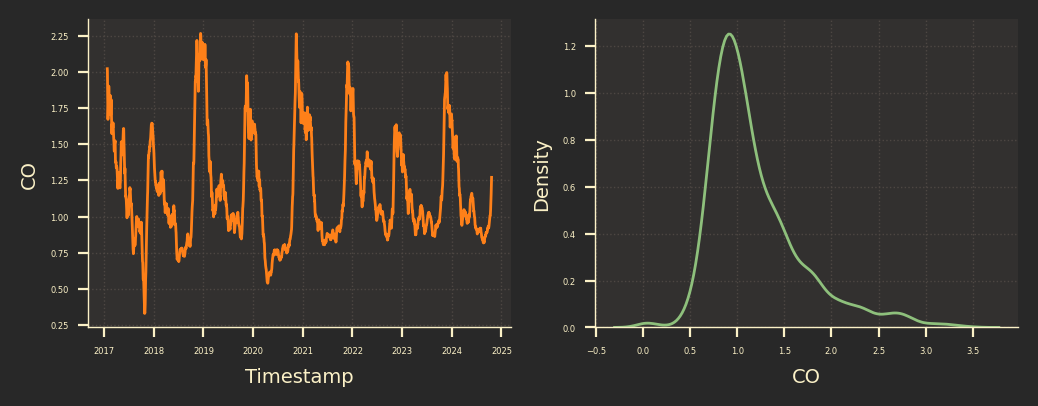

In [27]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.lineplot(x=df.Timestamp , y=df["CO"].rolling(24).mean(),color="C4")
plt.subplot(1,2,2)
sns.kdeplot(df["CO"],color="C5")

<Axes: xlabel='SO2', ylabel='Density'>

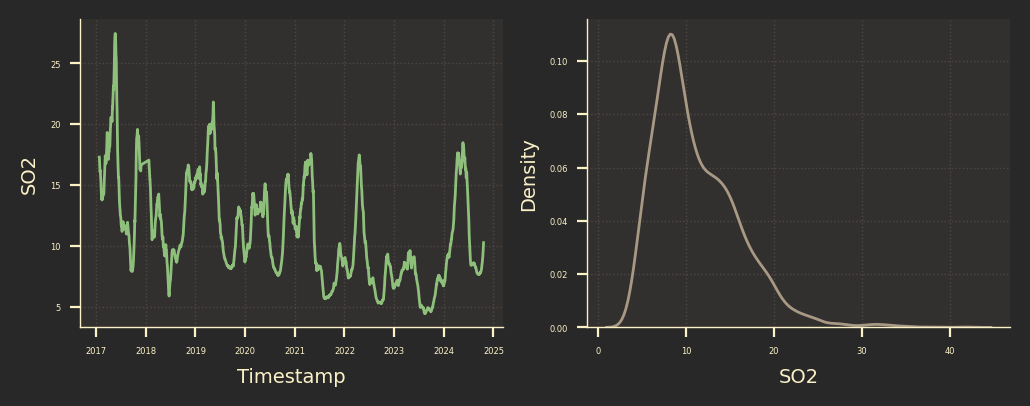

In [28]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.lineplot(x=df.Timestamp , y=df["SO2"].rolling(24).mean(),color="C5")
plt.subplot(1,2,2)
sns.kdeplot(df["SO2"],color="C6")

<Axes: xlabel='Ozone', ylabel='Density'>

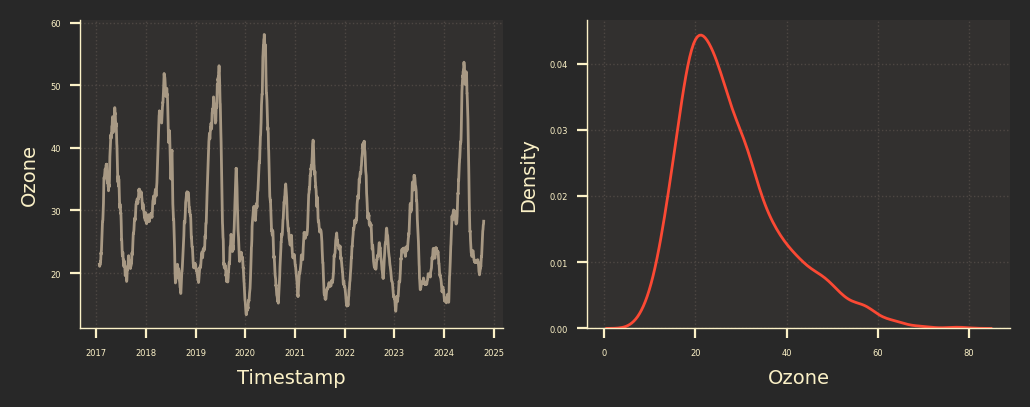

In [29]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.lineplot(x=df.Timestamp , y=df["Ozone"].rolling(24).mean(),color="C6")
plt.subplot(1,2,2)
sns.kdeplot(df["Ozone"],color="C7")

<Axes: xlabel='Timestamp', ylabel='Temp_F'>

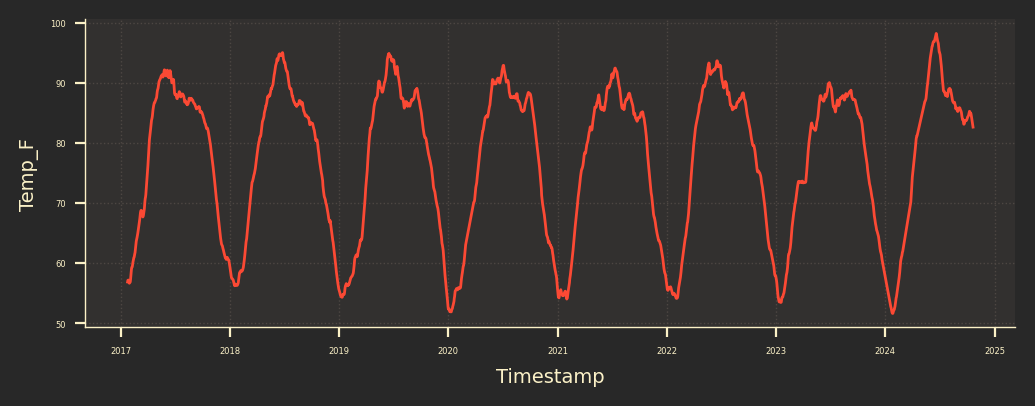

In [30]:
plt.figure(figsize=(6,2))
sns.lineplot(x=df.Timestamp , y=df["Temp_F"].rolling(24).mean(),color="C7")

<Axes: xlabel='DewPoint', ylabel='Density'>

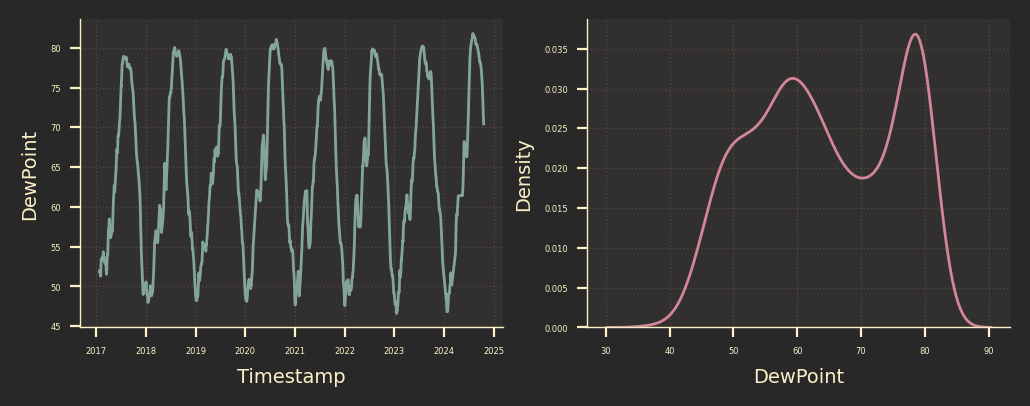

In [31]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.lineplot(x=df.Timestamp , y=df["DewPoint"].rolling(24).mean(),color="C2")
plt.subplot(1,2,2)
sns.kdeplot(df["DewPoint"],color="C3")

<Axes: xlabel='Humidity', ylabel='Density'>

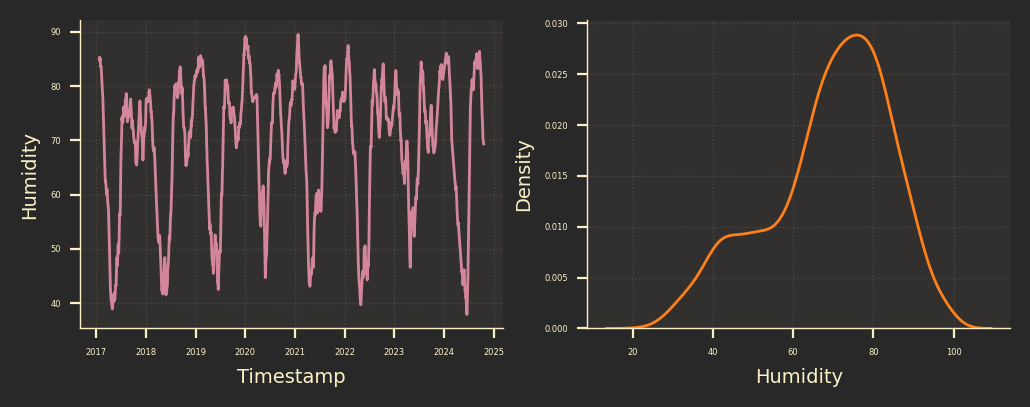

In [32]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.lineplot(x=df.Timestamp , y=df["Humidity"].rolling(24).mean(),color="C3")
plt.subplot(1,2,2)
sns.kdeplot(df["Humidity"],color="C4")

<Axes: xlabel='Visibility', ylabel='Density'>

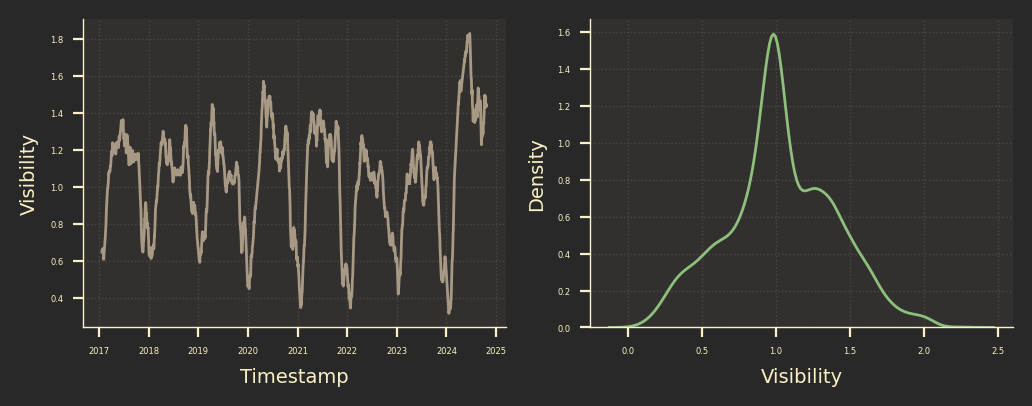

In [33]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
sns.lineplot(x=df.Timestamp , y=df["Visibility"].rolling(24).mean(),color="C6")
plt.subplot(1,2,2)
sns.kdeplot(df["Visibility"],color="C5")

<Axes: >

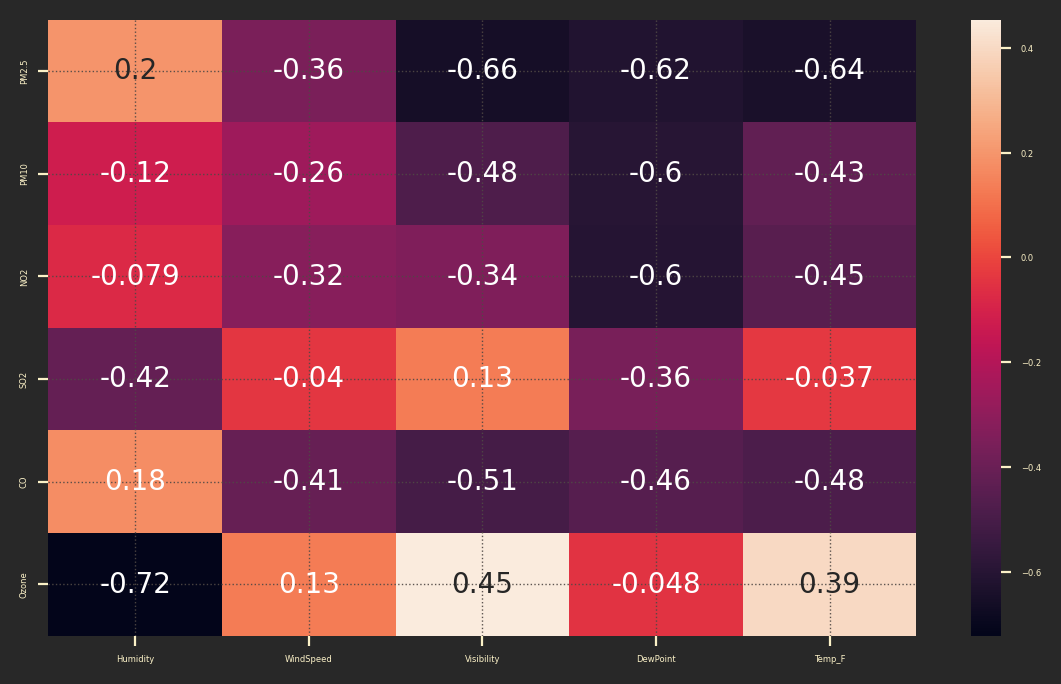

In [34]:
correlation = numeric.corr().loc[pollutants][weather]
sns.heatmap(correlation ,annot = True)

<h3 style="color:#e7d3d3"> Data Transformation & Processing </h3>

In [35]:
df["PM2.5"] = np.where(df["PM2.5"] > df["PM10"],
                       df["PM10"],
                       df["PM2.5"])

In [36]:
df = df.ffill()

<h3 style="color:#e7d3d3"> Setting Data For LSTM </h3>

In [37]:
pollutants = df[["Timestamp","PM2.5","PM10","NO2","CO","SO2"]]

In [38]:

pollutants["sin_month"] = np.sin(2* np.pi * pollutants["Timestamp"].dt.month /12 )
pollutants["cos_month"] = np.cos(2* np.pi * pollutants["Timestamp"].dt.month /12 )
pollutants = pollutants.set_index("Timestamp")

In [39]:
from datetime import datetime , timedelta
train_end_value = datetime(2023,12,31)


In [18]:
df["PM2.5"] = np.log1p(df["PM2.5"])
df["PM10"]  = np.log1p(df["PM10"])
df["CO"]    = np.log1p(df["CO"])
df["NO2"]   = np.log1p(df["NO2"])
df["SO2"]   = np.log1p(df["SO2"])
df["Ozone"] = np.log1p(df["Ozone"])

KeyError: 'PM2.5'

<Axes: xlabel='Ozone', ylabel='Density'>

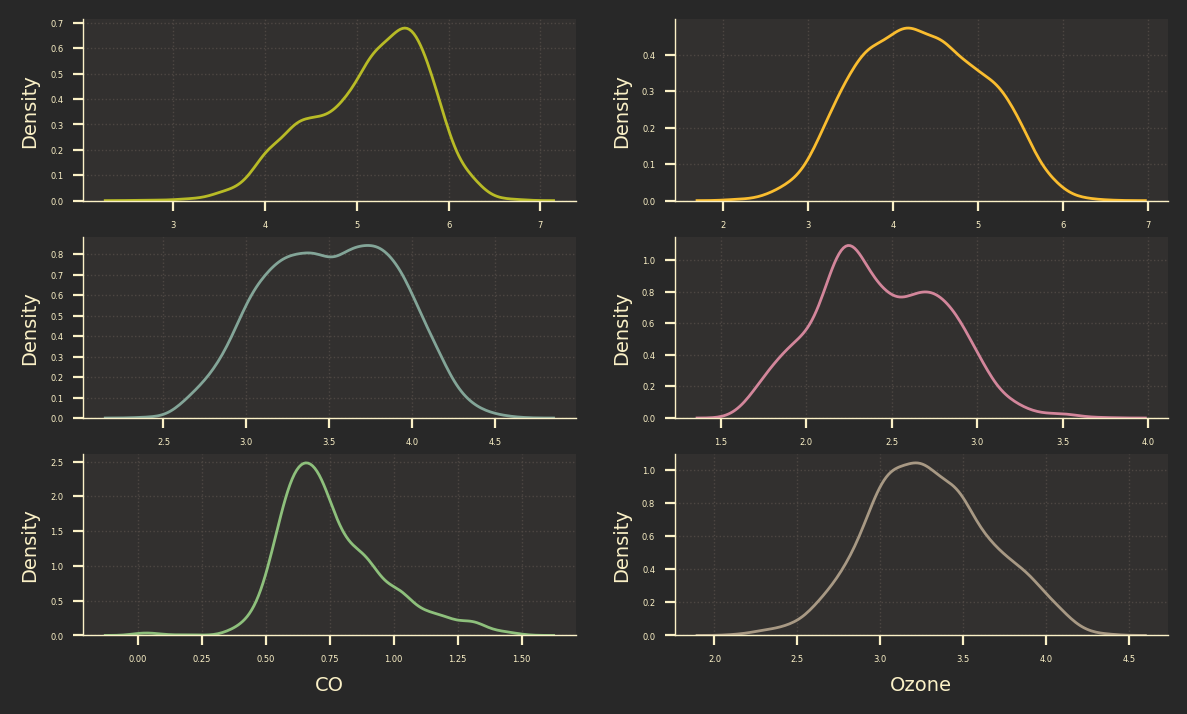

In [41]:
plt.subplot(3,2,1)
sns.kdeplot(df["PM10"])

plt.subplot(3,2,2)
sns.kdeplot(df["PM2.5"],color="C1")

plt.subplot(3,2,3)
sns.kdeplot(df["NO2"],color="C2")

plt.subplot(3,2,4)
sns.kdeplot(df["SO2"],color="C3")

plt.subplot(3,2,5)
sns.kdeplot(df["CO"],color="C5")

plt.subplot(3,2,6)
sns.kdeplot(df["Ozone"],color="C6")


In [42]:
weather = df[["Timestamp","Humidity","WindSpeed","Visibility","DewPoint","Temp_F"]]
weather.set_index("Timestamp",inplace=True)
weather_train_data = weather[:train_end_value]
weather_test_data = weather[train_end_value+timedelta(days=1):]

In [43]:
weather_train_data.to_csv("weather_train_data.csv")
weather_test_data.to_csv("weather_test_data.csv")